In [8]:
# Read Mutual File
mf = pd.read_csv(r'C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/data/raw/Mutual_Funds.csv')

mf.shape

(29033646, 7)

In [9]:
#First 5 Records
mf.head()

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
0,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,29-05-2008,10.7205
1,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,28-05-2008,10.7250
2,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,27-05-2008,10.7216
3,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,26-05-2008,10.7206
4,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,23-05-2008,10.7152


In [10]:
# Get no of Mutual Fund Schemes
print("Number of Schemes are:",len(set(mf['Scheme_Name'])))

Number of Schemes are: 35350


In [11]:
# Convert Date Column as String to Date format
mf['Date'] = pd.to_datetime(mf['Date'],format='%d-%m-%Y')

In [12]:
# Filter Records where NAV is 0
mf = mf[mf['NAV']!=0]
# Compute Returns
mf['return']=mf.groupby(['Scheme_Name'])['NAV'].pct_change(periods=-1)

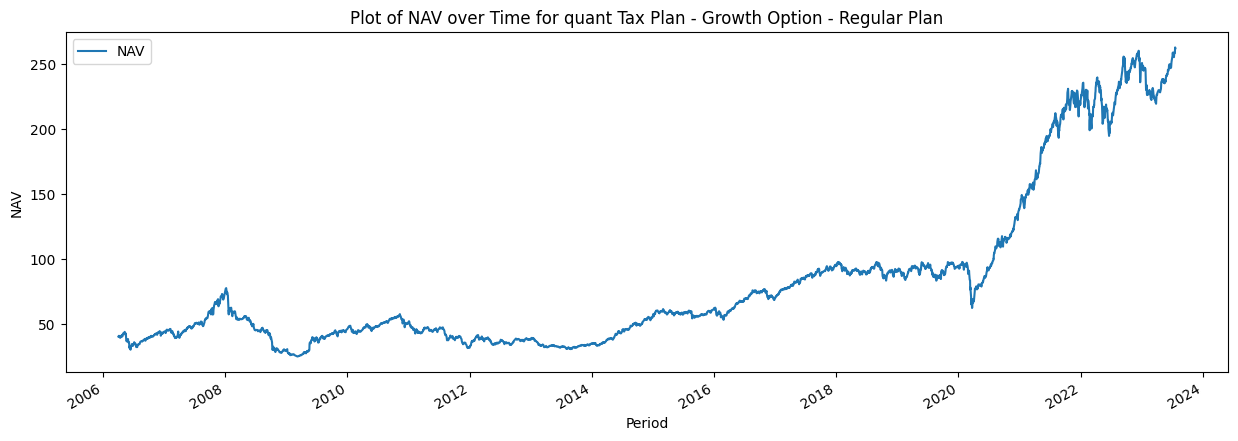

In [14]:
# Analysis of quant Tax Plan - Growth Option - Regular Plan
analysis_df = mf[mf['Scheme_Name']=='quant Tax Plan - Growth Option - Regular Plan'][['Scheme_Name','Date','NAV','return']]
analysis_df.sort_values('Date',inplace=True)
analysis_df = analysis_df.set_index('Date')
Portfolio = analysis_df['Scheme_Name'].iloc[1]
analysis_df.plot(y='NAV',kind='line',figsize=(15,5))
plt.xlabel('Period')
plt.ylabel('NAV')
plt.title('Plot of NAV over Time for ' + Portfolio)
plt.show()

# Top 10 Mutual Funds by Total Duration Available

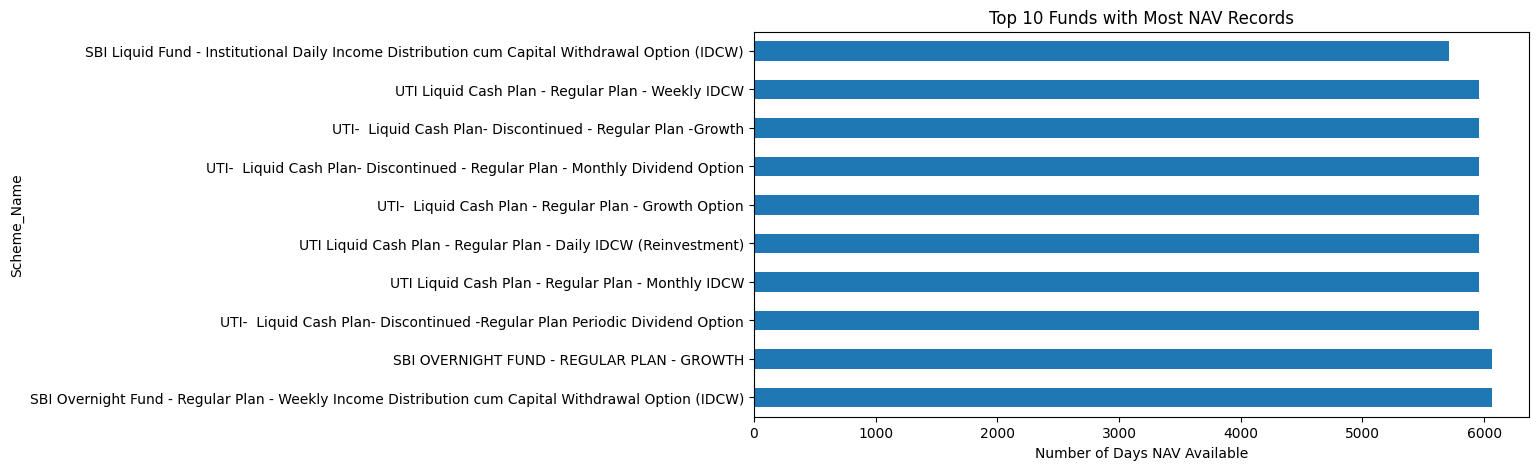

In [15]:
top_duration_funds = mf.groupby('Scheme_Name')['Date'].count().sort_values(ascending=False).head(10)
top_duration_funds.plot(kind='barh', figsize=(10, 5), title='Top 10 Funds with Most NAV Records')
plt.xlabel('Number of Days NAV Available')
plt.show()


## Top 5 Funds by Cumulative Return

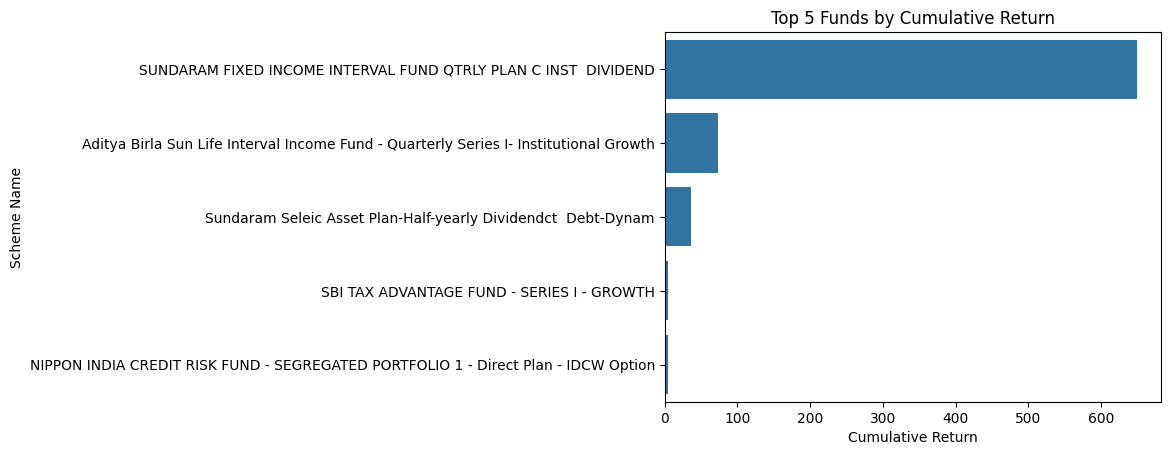

In [16]:
cumulative_returns = mf.copy()
cumulative_returns['cumulative_return'] = (1 + cumulative_returns['return']).groupby(cumulative_returns['Scheme_Name']).cumprod()

latest_returns = cumulative_returns.sort_values('Date').groupby('Scheme_Name').tail(1)
top_5_cumulative = latest_returns.sort_values('cumulative_return', ascending=False).head(5)

sns.barplot(data=top_5_cumulative, x='cumulative_return', y='Scheme_Name')
plt.title('Top 5 Funds by Cumulative Return')
plt.xlabel('Cumulative Return')
plt.ylabel('Scheme Name')
plt.show()


### Return Distribution for Selected Fund

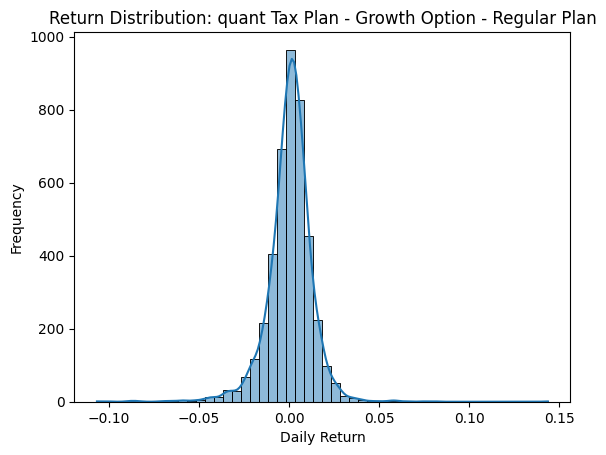

In [17]:
selected_fund = 'quant Tax Plan - Growth Option - Regular Plan'
fund_df = mf[mf['Scheme_Name'] == selected_fund]

sns.histplot(fund_df['return'], bins=50, kde=True)
plt.title(f'Return Distribution: {selected_fund}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


## NAV Comparison of Top 3 Longest-running Funds

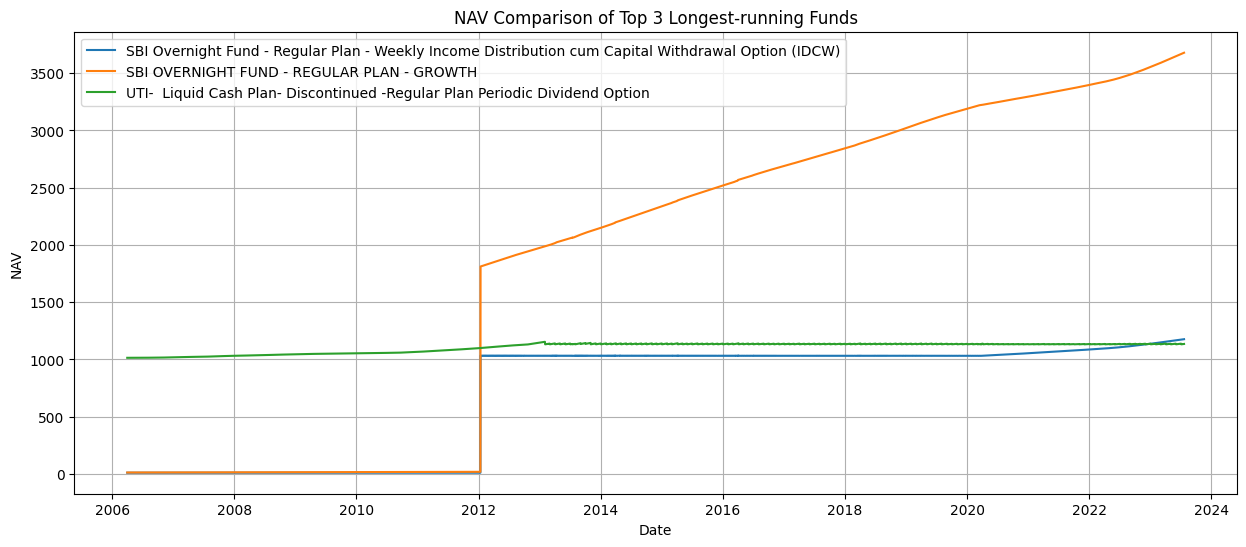

In [19]:
top3_schemes = top_duration_funds.head(3).index.tolist()
top3_df = mf[mf['Scheme_Name'].isin(top3_schemes)]

plt.figure(figsize=(15,6))
for scheme in top3_schemes:
    scheme_df = top3_df[top3_df['Scheme_Name'] == scheme]
    plt.plot(scheme_df['Date'], scheme_df['NAV'], label=scheme)

plt.legend()
plt.title('NAV Comparison of Top 3 Longest-running Funds')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.grid(True)
plt.show()


## Full EDA Function 

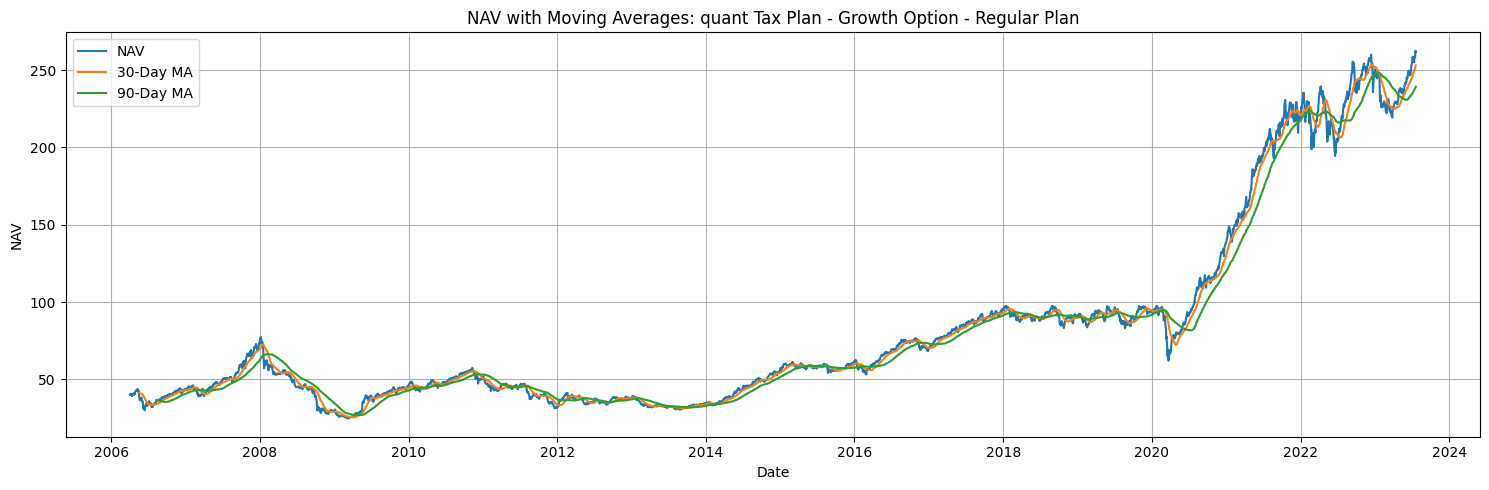

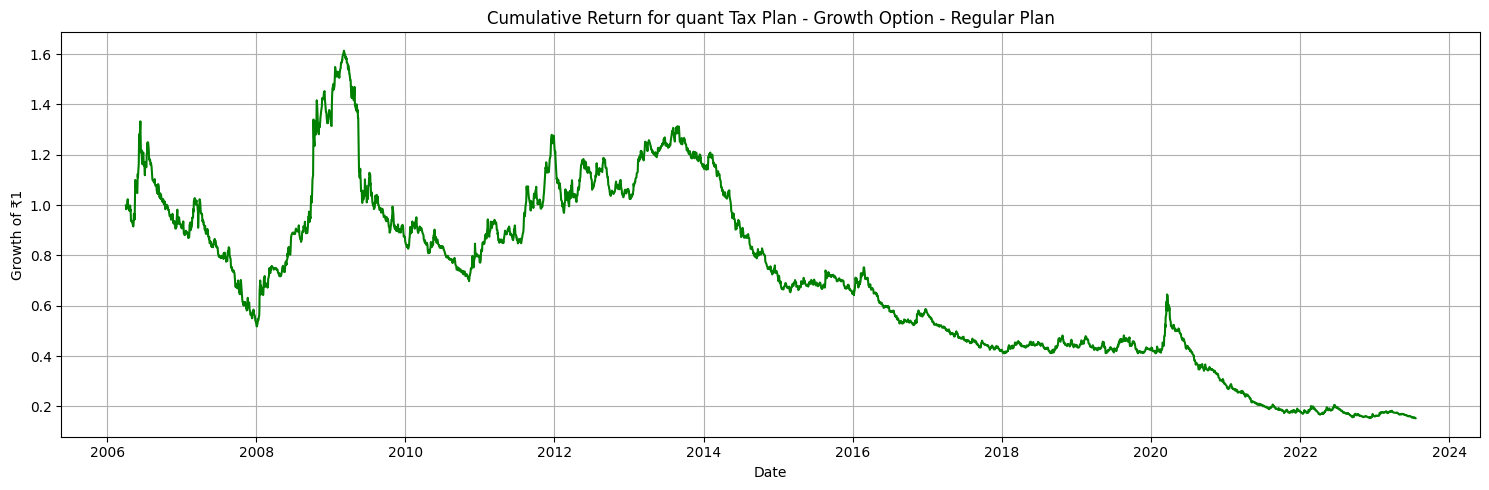

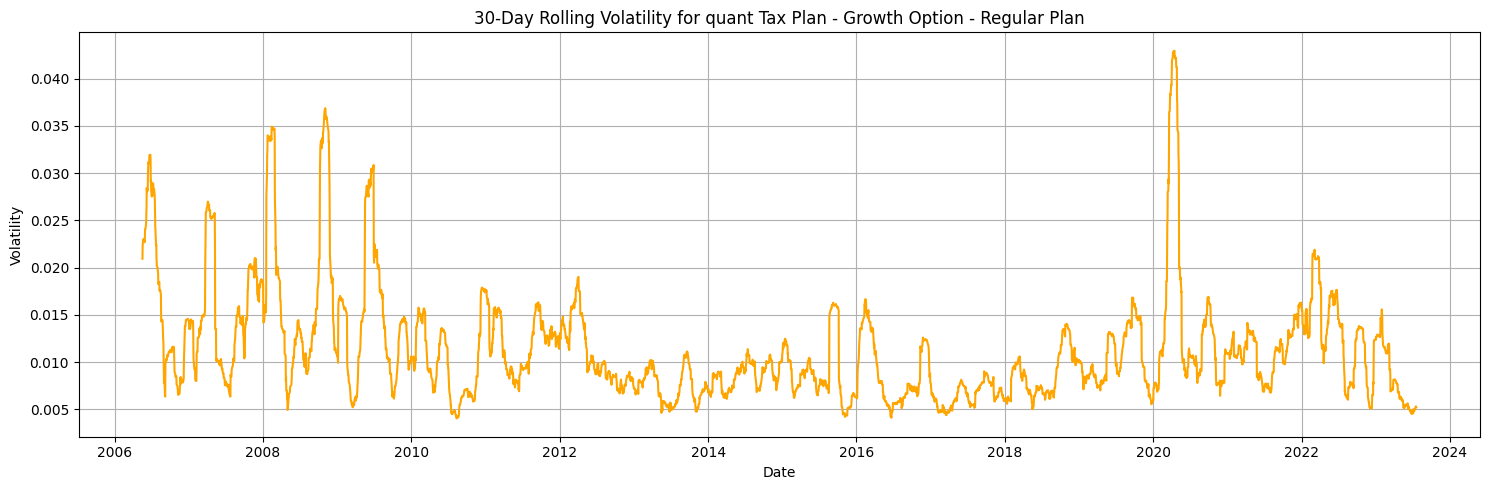

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,NAV,return,cumulative_return,rolling_volatility,MA_30,MA_90
Date,,,,,,,,,,,
2006-04-03,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,40.1040,-0.001469,0.998531,NaN,NaN,NaN
2006-04-04,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,40.1630,-0.014917,0.983636,NaN,NaN,NaN
2006-04-05,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,40.7712,0.009058,0.992546,NaN,NaN,NaN
2006-04-07,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,40.4052,-0.007163,0.985436,NaN,NaN,NaN
2006-04-10,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,40.6967,0.021083,1.006212,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,259.1635,0.003144,0.155230,0.005184,250.832170,237.848480
2023-07-18,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,258.3513,-0.009533,0.153751,0.005314,251.378863,238.181563
2023-07-19,quant Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100175,quant Tax Plan - Growth Option - Regular Plan,260.8378,-0.006498,0.152752,0.005261,251.960253,238.519677


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_mutual_fund_scheme(mf, scheme_name):
    """
    Perform advanced EDA on a single mutual fund scheme:
    - Calculates return, cumulative return, volatility, and moving averages
    - Plots NAV, moving averages, cumulative returns, and volatility
    """
    scheme_df = mf[mf['Scheme_Name'] == scheme_name].copy()
    scheme_df.sort_values('Date', inplace=True)
    scheme_df.set_index('Date', inplace=True)

    # Compute returns
    scheme_df['return'] = scheme_df['NAV'].pct_change(periods=-1)
    scheme_df['cumulative_return'] = (1 + scheme_df['return']).cumprod()
    scheme_df['rolling_volatility'] = scheme_df['return'].rolling(30).std()
    scheme_df['MA_30'] = scheme_df['NAV'].rolling(30).mean()
    scheme_df['MA_90'] = scheme_df['NAV'].rolling(90).mean()

    # Plot NAV + MAs
    plt.figure(figsize=(15, 5))
    plt.plot(scheme_df['NAV'], label='NAV')
    plt.plot(scheme_df['MA_30'], label='30-Day MA')
    plt.plot(scheme_df['MA_90'], label='90-Day MA')
    plt.title(f'NAV with Moving Averages: {scheme_name}')
    plt.xlabel('Date')
    plt.ylabel('NAV')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Cumulative Returns
    plt.figure(figsize=(15, 5))
    plt.plot(scheme_df['cumulative_return'], color='green')
    plt.title(f'Cumulative Return for {scheme_name}')
    plt.xlabel('Date')
    plt.ylabel('Growth of ₹1')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Rolling Volatility
    plt.figure(figsize=(15, 5))
    plt.plot(scheme_df['rolling_volatility'], color='orange')
    plt.title(f'30-Day Rolling Volatility for {scheme_name}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return scheme_df  # Return enriched dataframe for further use

scheme_name = 'quant Tax Plan - Growth Option - Regular Plan'
analyze_mutual_fund_scheme(mf, scheme_name)
